<a href="https://colab.research.google.com/github/ameenattar92/Cardiovascular-Risk-Prediction/blob/main/Vridhi_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). 

The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Description**
### **Demographic:**
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### **Behavioral**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

### **Medical( history)**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [38]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble

%matplotlib inline

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
path = '/content/drive/MyDrive/Cardiovascular Risk Prediction- Vridhi Parmar/data/data_cardiovascular_risk.csv'

In [41]:
cvs_df = pd.read_csv(path , index_col = "id")

#1. Explorartory Data Analysis

In [42]:
#Checking the first five observations
cvs_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [43]:
#Checking the bottom five observations
cvs_df.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [44]:
#Checking the shape of our dataset
cvs_df.shape

(3390, 16)

In [45]:
#Looking at the info of our dataset
cvs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [46]:
#Renaming the column names
cvs_df.rename(columns = {'totChol' : 'Total_Cholestrol'}, inplace=True)
cvs_df.rename(columns = {'sysBP' : 'Systolic_BP'}, inplace=True)
cvs_df.rename(columns = {'diaBP' : 'Diastolic_BP'}, inplace=True)

In [47]:
cvs_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,Total_Cholestrol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [48]:
# Class count
class_count_0, class_count_1 = cvs_df['TenYearCHD'].value_counts()

# Separate class
class_0 = cvs_df[cvs_df['TenYearCHD'] == 0]
class_1 = cvs_df[cvs_df['TenYearCHD'] == 1]
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (2879, 16)
class 1: (511, 16)


In [49]:
# Filling up the numerical NaN values using mode

cvs_df['education'].fillna(cvs_df['education'].mode()[0], inplace=True)
cvs_df['cigsPerDay'].fillna(cvs_df['cigsPerDay'].mode()[0], inplace=True)
cvs_df['BPMeds'].fillna(cvs_df['BPMeds'].mode()[0], inplace=True)
cvs_df['Total_Cholestrol'].fillna(cvs_df['Total_Cholestrol'].mode()[0], inplace=True)
cvs_df['glucose'].fillna(cvs_df['glucose'].mode()[0], inplace=True)
cvs_df['BMI'].fillna(cvs_df['BMI'].mode()[0], inplace=True)
cvs_df['heartRate'].fillna(cvs_df['heartRate'].mode()[0], inplace=True)

**Is Heart rate is responsible for CHD ??**

In [50]:
def heartRate_data(row):
    if row['heartRate'] <= 59:
        value = 'Low'
    elif row['heartRate'] < 100:
        value = 'Normal'
    else:
        value = "High"
    
    return value

In [51]:
cvs_df['heartRateLabel'] = cvs_df.apply(heartRate_data, axis = 1)

In [52]:
cvs_df.drop(columns=['heartRateLabel'], inplace=True)

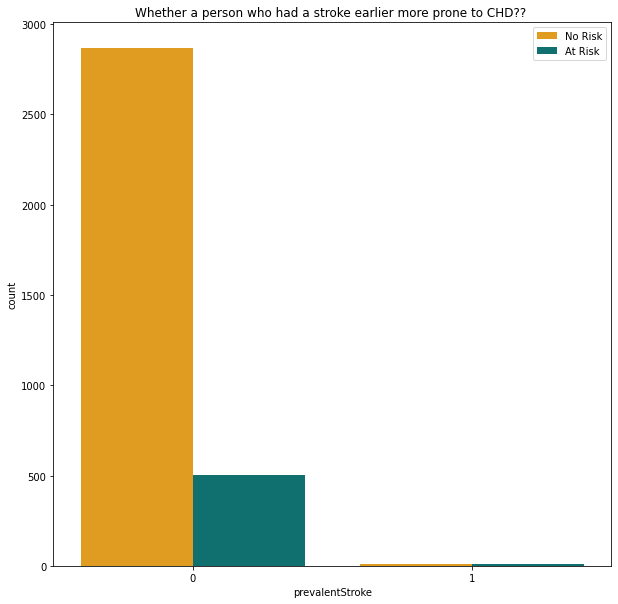

In [53]:
plt.figure(figsize = (10,10))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = cvs_df['prevalentStroke'], hue = cvs_df['TenYearCHD'], palette = my_palette)
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

**Over the years, research has found that both numbers are equally important in monitoring heart health. However, most studies show a greater risk of stroke and heart disease related to higher systolic pressures compared with elevated diastolic pressures.**

In [54]:
cvs_df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,Total_Cholestrol,Systolic_BP,Diastolic_BP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,22.91,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


#2. Model Building


In [55]:
# check datatype
cvs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               3390 non-null   int64  
 1   education         3390 non-null   float64
 2   sex               3390 non-null   object 
 3   is_smoking        3390 non-null   object 
 4   cigsPerDay        3390 non-null   float64
 5   BPMeds            3390 non-null   float64
 6   prevalentStroke   3390 non-null   int64  
 7   prevalentHyp      3390 non-null   int64  
 8   diabetes          3390 non-null   int64  
 9   Total_Cholestrol  3390 non-null   float64
 10  Systolic_BP       3390 non-null   float64
 11  Diastolic_BP      3390 non-null   float64
 12  BMI               3390 non-null   float64
 13  heartRate         3390 non-null   float64
 14  glucose           3390 non-null   float64
 15  TenYearCHD        3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory 

change categorical data from labels to numbers.

In [56]:
# 1 = Male, 0 = Female
cvs_df['sex'] = cvs_df['sex'].apply(lambda x: 1 if x=='M' else 0)

# 1 = Yes, 0 = No
cvs_df['is_smoking'] = cvs_df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)

In [57]:
X = cvs_df.drop(columns=['TenYearCHD']).values
Y = cvs_df['TenYearCHD'].values

applying decision tree before sampling

In [58]:
# perform split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [59]:
# now we train and build our model
decision_tree_model = DecisionTreeClassifier(criterion="gini",max_leaf_nodes= 10,random_state=0)
decision_tree_model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [60]:
train_preds = decision_tree_model.predict(X_train)
test_preds = decision_tree_model.predict(X_test)

In [61]:
#Measuring Accuracy and AUC-ROC score
testing_accuracy = accuracy_score(Y_test, test_preds) * 100
print(f'the testing accuracy is {testing_accuracy}')
training_accuracy = accuracy_score(Y_train,train_preds) *100
print(f'the training accuracy is {training_accuracy}')

the testing accuracy is 84.21828908554573
the training accuracy is 86.20943952802361


[Text(426.25, 841.2857142857143, 'X[10] <= 142.75\ngini = 0.255\nsamples = 2712\nvalue = [2305, 407]'),
 Text(155.0, 711.8571428571429, 'X[0] <= 50.5\ngini = 0.192\nsamples = 2007\nvalue = [1791, 216]'),
 Text(77.5, 582.4285714285714, 'gini = 0.135\nsamples = 1296\nvalue = [1202, 94]'),
 Text(232.5, 582.4285714285714, 'X[14] <= 147.5\ngini = 0.284\nsamples = 711\nvalue = [589, 122]'),
 Text(155.0, 453.00000000000006, 'gini = 0.275\nsamples = 700\nvalue = [585, 115]'),
 Text(310.0, 453.00000000000006, 'gini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(697.5, 711.8571428571429, 'X[14] <= 195.5\ngini = 0.395\nsamples = 705\nvalue = [514, 191]'),
 Text(620.0, 582.4285714285714, 'X[0] <= 54.5\ngini = 0.384\nsamples = 694\nvalue = [514, 180]'),
 Text(465.0, 453.00000000000006, 'X[2] <= 0.5\ngini = 0.29\nsamples = 329\nvalue = [271, 58]'),
 Text(387.5, 323.57142857142867, 'gini = 0.19\nsamples = 179\nvalue = [160, 19]'),
 Text(542.5, 323.57142857142867, 'gini = 0.385\nsamples = 150\nvalue =

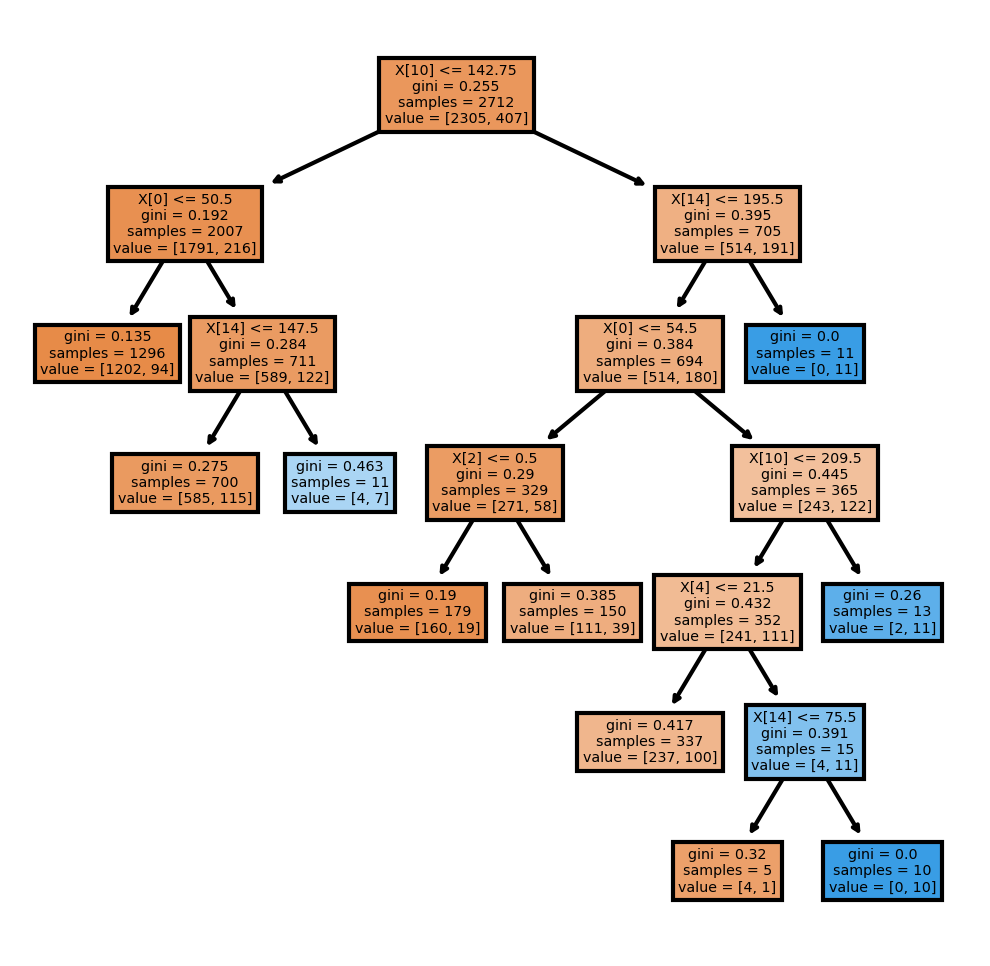

In [62]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree_model,filled=True)

In [63]:
smote = SMOTE()
# fit predictor and target variable
X_balanced, Y_balanced = smote.fit_resample(cvs_df.iloc[:,0:-1], cvs_df['TenYearCHD'])

In [64]:
print('Original dataset shape', cvs_df.shape)
print('Resampled dataset shape', X_balanced.shape)

Original dataset shape (3390, 16)
Resampled dataset shape (5758, 15)


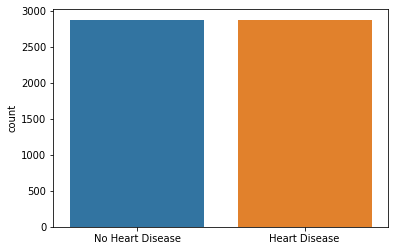

In [65]:
# visualizing the target variable after resample
g = sns.countplot(Y_balanced)
g.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.show()

Now we have balanced dataset so we can apply logistic regression on balanced dataset

In [66]:
# split the data
X_train, X_test, Y_train, Y_test = train_test_split(X_balanced, Y_balanced, test_size=0.2, random_state=0)

### Building Desicion Tree Model after sampling
Decision tree is a type of supervised learning algorithm that is mostly used in classification problems. It works for both categorical and continuous input and output variables.

In [67]:
# now we train and build our model
decision_tree_model = DecisionTreeClassifier(criterion="gini",max_leaf_nodes= 10,random_state=0)
decision_tree_model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [68]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4606, 15)
(4606,)
(1152, 15)
(1152,)


## Predicting on test cell and train cell

In [69]:
train_preds = decision_tree_model.predict(X_train)
test_preds = decision_tree_model.predict(X_test)

In [70]:
#Measuring Accuracy and AUC-ROC score
testing_accuracy = accuracy_score(Y_test, test_preds) * 100
print(f'the testing accuracy is {testing_accuracy}')
training_accuracy = accuracy_score(Y_train,train_preds) *100
print(f'the training accuracy is {training_accuracy}')

the testing accuracy is 72.04861111111111
the training accuracy is 74.51150673035171


In [71]:
test_preds[:10]

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [72]:
Y_test[:10]

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [73]:
train_preds[0:10]

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

[Text(310.0, 841.2857142857143, 'X[7] <= 0.0\ngini = 0.5\nsamples = 4606\nvalue = [2326, 2280]'),
 Text(155.0, 711.8571428571429, 'X[0] <= 43.017\ngini = 0.458\nsamples = 2612\nvalue = [1683, 929]'),
 Text(77.5, 582.4285714285714, 'gini = 0.277\nsamples = 814\nvalue = [679, 135]'),
 Text(232.5, 582.4285714285714, 'X[2] <= 0.004\ngini = 0.493\nsamples = 1798\nvalue = [1004, 794]'),
 Text(155.0, 453.00000000000006, 'gini = 0.422\nsamples = 838\nvalue = [585, 253]'),
 Text(310.0, 453.00000000000006, 'X[2] <= 0.999\ngini = 0.492\nsamples = 960\nvalue = [419, 541]'),
 Text(232.5, 323.57142857142867, 'gini = 0.0\nsamples = 225\nvalue = [0, 225]'),
 Text(387.5, 323.57142857142867, 'gini = 0.49\nsamples = 735\nvalue = [419, 316]'),
 Text(465.0, 711.8571428571429, 'X[7] <= 0.999\ngini = 0.437\nsamples = 1994\nvalue = [643, 1351]'),
 Text(387.5, 582.4285714285714, 'gini = 0.0\nsamples = 448\nvalue = [0, 448]'),
 Text(542.5, 582.4285714285714, 'X[0] <= 48.03\ngini = 0.486\nsamples = 1546\nvalue =

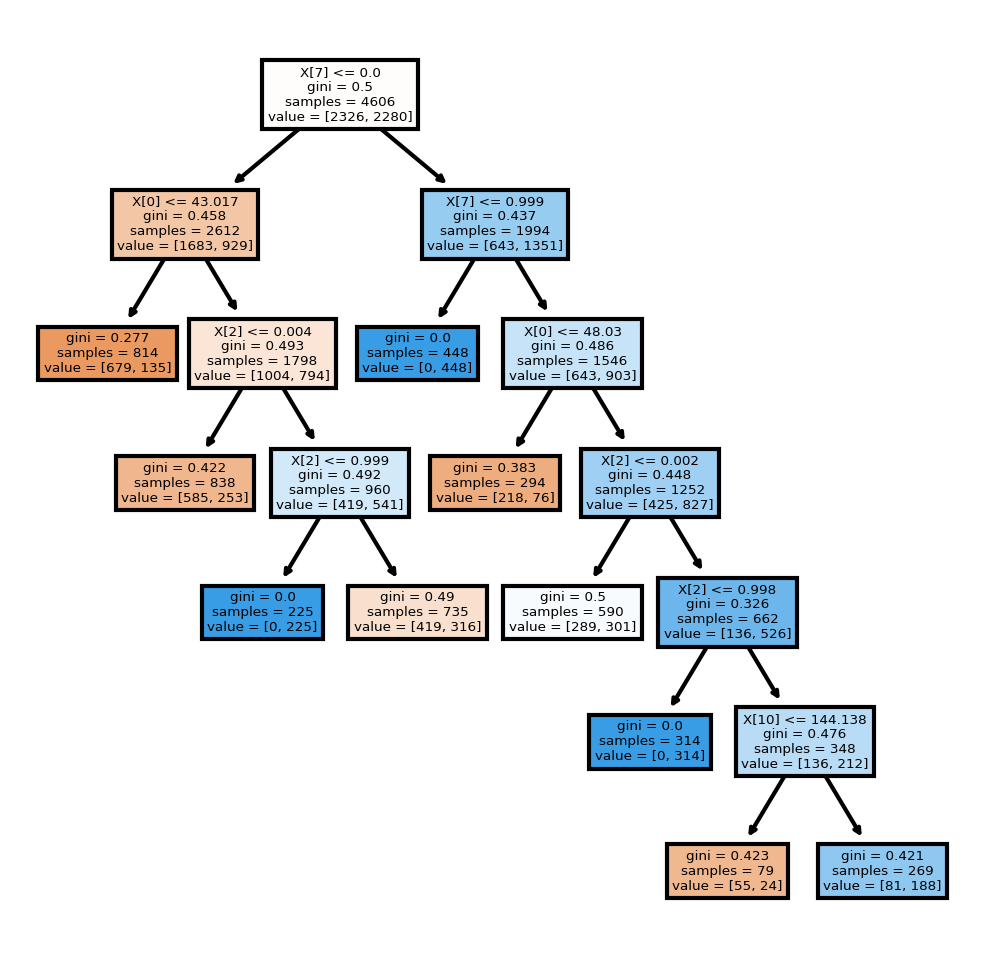

In [74]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree_model,filled=True)

[[1956  370]
 [ 804 1476]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

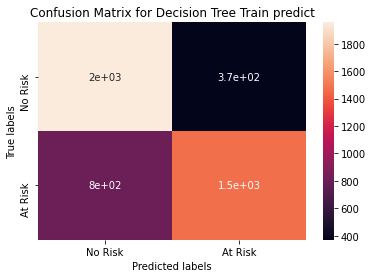

In [75]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[447 106]
 [216 383]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

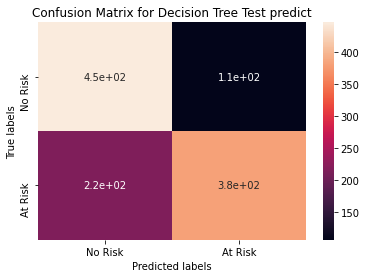

In [76]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [77]:
#classification report for train
print(classification_report(Y_train, train_preds))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77      2326
           1       0.80      0.65      0.72      2280

    accuracy                           0.75      4606
   macro avg       0.75      0.74      0.74      4606
weighted avg       0.75      0.75      0.74      4606



In [78]:
#classification report for test
print(classification_report(Y_test, test_preds))

              precision    recall  f1-score   support

           0       0.67      0.81      0.74       553
           1       0.78      0.64      0.70       599

    accuracy                           0.72      1152
   macro avg       0.73      0.72      0.72      1152
weighted avg       0.73      0.72      0.72      1152



## Building Ensembles of Decision Tree


In [79]:
#Random Forest
# classifier = RandomForestClassifier() 
# grid_values = {'n_estimators':[40,80,120,160], 'max_depth':[5, 7, 10, 15,20]}
# classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

In [80]:
classifier = RandomForestClassifier(n_estimators=30,max_depth=20,random_state=30,min_samples_split=3,criterion='entropy')

In [81]:
classifier.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=30, verbose=0,
                       warm_start=False)

In [82]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

Finding the accuracy and Roc_Auc score

In [83]:
accuracy_score(Y_train,train_preds)

0.9982631350412505

In [84]:
accuracy_score(Y_test,test_preds)

0.9071180555555556

In [85]:
roc_auc_score(Y_test,test_preds)

0.908670870981473

In [86]:
roc_auc_score(Y_train,train_preds)

0.9982456140350877

[[2326    0]
 [   8 2272]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

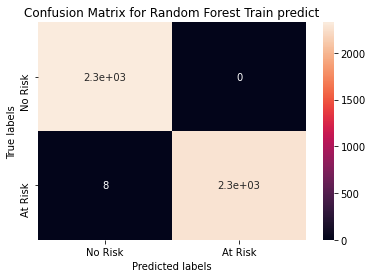

In [87]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[524  29]
 [ 78 521]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

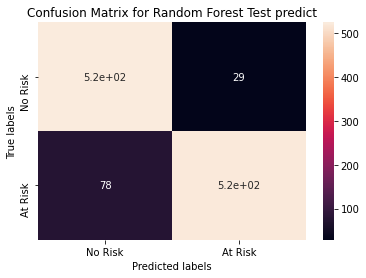

In [88]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Random Forest Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [89]:
#classification report for train
print(classification_report(Y_train, train_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2326
           1       1.00      1.00      1.00      2280

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606



In [90]:
#classification report for test
print(classification_report(Y_test, test_preds))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       553
           1       0.95      0.87      0.91       599

    accuracy                           0.91      1152
   macro avg       0.91      0.91      0.91      1152
weighted avg       0.91      0.91      0.91      1152



In [91]:
# Gradient Boost Classifier
gradientBC = GradientBoostingClassifier(learning_rate=0.001,n_estimators=30,max_depth=20,random_state=30,min_samples_split=3)

In [92]:
gradientBC = GradientBoostingClassifier()
 
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7 , 10],'learning_rate':[0.0001,0.001,0.01,0.05,0.000001,0.0003]}
classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

In [93]:
gradientBC.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [94]:
train_preds =  gradientBC.predict(X_train)
test_preds  = gradientBC.predict(X_test)

The accuracy and Roc_Auc Score

In [95]:
accuracy_score(Y_train,train_preds)

0.9033868866695615

In [96]:
accuracy_score(Y_test,test_preds)

0.8793402777777778

In [97]:
roc_auc_score(Y_test,test_preds)


0.8822374240370477

In [98]:
roc_auc_score(Y_train,train_preds)

0.902616116818271

[[2279   47]
 [ 398 1882]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

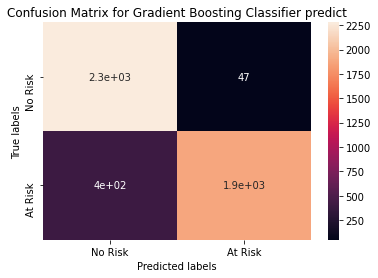

In [99]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boosting Classifier predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[528  25]
 [114 485]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

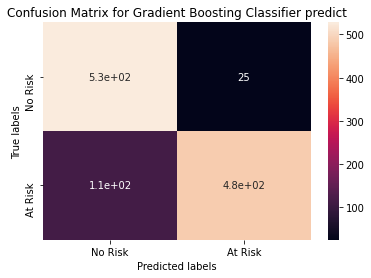

In [100]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Gradient Boosting Classifier predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Text(0.5, 1.0, 'Roc Auc Curve for Gradient Boosting Classifier')

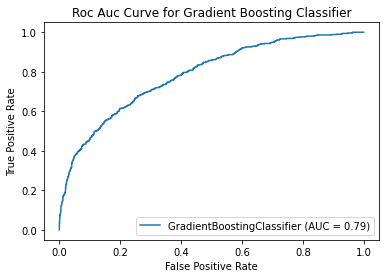

In [101]:
plot_roc_curve(gradientBC,X,Y)
plt.title("Roc Auc Curve for Gradient Boosting Classifier")

classification repost of train and test

In [102]:
print(classification_report(Y_test, test_preds))
print('\n')
print(classification_report(Y_train, train_preds))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       553
           1       0.95      0.81      0.87       599

    accuracy                           0.88      1152
   macro avg       0.89      0.88      0.88      1152
weighted avg       0.89      0.88      0.88      1152



              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2326
           1       0.98      0.83      0.89      2280

    accuracy                           0.90      4606
   macro avg       0.91      0.90      0.90      4606
weighted avg       0.91      0.90      0.90      4606



In [104]:
#using XGBoost
xg_cla = xgb.XGBClassifier(objective='binary:logistic',colsample_bytree = 0.7, learning_rate = 0.01,
                max_depth = 10, alpha = 10, n_estimators = 10,subsample=1)

In [105]:
xg_cla.fit(X_test,Y_test)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [106]:
train_preds = xg_cla.predict(X_train)
test_preds = xg_cla.predict(X_test)

In [107]:
accuracy_score(Y_train,train_preds)

0.8252279635258358

In [108]:
accuracy_score(Y_test,test_preds)

0.9609375

In [109]:
roc_auc_score(Y_test,test_preds)

0.9609098346551064

In [110]:
roc_auc_score(Y_train,train_preds)

0.8252690787588058

[[1910  416]
 [ 389 1891]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

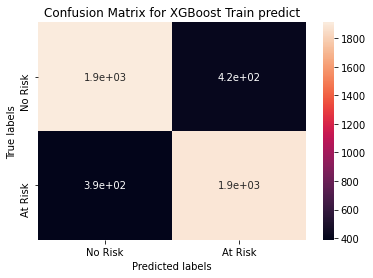

In [111]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBoost Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[531  22]
 [ 23 576]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

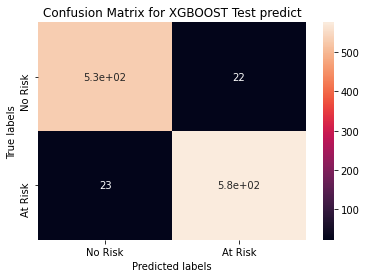

In [112]:
#the confusion matrix for testing
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(Y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for XGBOOST Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Classifucation Repost For train and test

In [113]:
print(classification_report(Y_test, test_preds))
print('\n')
print(classification_report(Y_train, train_preds))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       553
           1       0.96      0.96      0.96       599

    accuracy                           0.96      1152
   macro avg       0.96      0.96      0.96      1152
weighted avg       0.96      0.96      0.96      1152



              precision    recall  f1-score   support

           0       0.83      0.82      0.83      2326
           1       0.82      0.83      0.82      2280

    accuracy                           0.83      4606
   macro avg       0.83      0.83      0.83      4606
weighted avg       0.83      0.83      0.83      4606



Visualising the tree

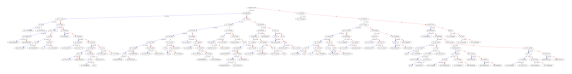

In [114]:
ax=xgb.plot_tree(xg_cla,num_trees=0)
ax.figure.set_size_inches(10,100)
plt.show()

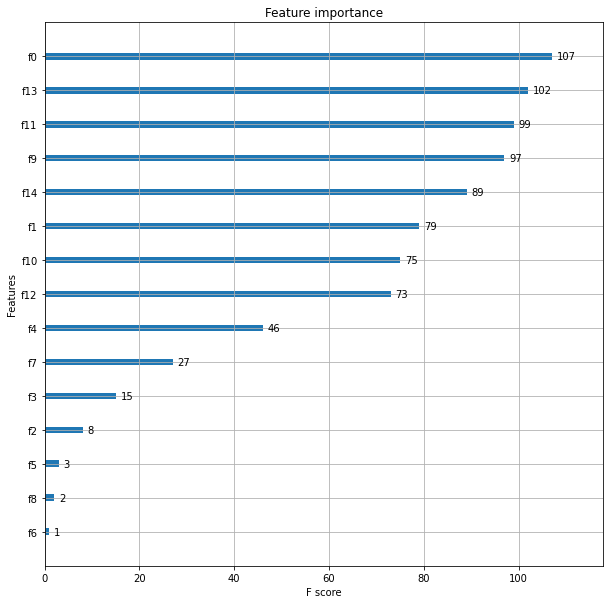

In [115]:
ax=xgb.plot_importance(xg_cla)
ax.figure.set_size_inches(10,10)
plt.show()